In [1]:
!pip install -U langchain langchain-community langchainhub faiss-cpu pypdf unstructured tiktoken groq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━

In [2]:
!pip install -U langchain-groq
# install Groq Python API and the LangChain–Groq integration
%pip install -qU groq langchain-groq


In [3]:
import os
from langchain_groq import ChatGroq   # LangChain wrapper for Groq
from groq import Groq                  # low‑level Groq REST client, if you ever need it

# set your key (or export in the Colab “Env vars” UI)
os.environ["GROQ_API_KEY"] = "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"
# instantiate the LangChain LLM
llm = ChatGroq(
    model="llama-3.1-8b-instant",   # or llama-3.1-16b-instant
    temperature=0.0,
    max_tokens=None,
    max_retries=2,
)

# quick smoke-test
resp = llm.invoke([{"role":"user","content":"What is a binary search?"}])
print(resp)


content='**Binary Search**\n================\n\nBinary search is an efficient algorithm for finding an item from a sorted list of items. It works by repeatedly dividing in half the portion of the list that could contain the item, until you\'ve narrowed down the possible locations to just one.\n\n**How Binary Search Works**\n---------------------------\n\nHere\'s a step-by-step explanation of the binary search algorithm:\n\n1. **Start with a sorted list**: The list must be sorted in ascending or descending order.\n2. **Find the middle element**: Calculate the middle index of the list.\n3. **Compare the target element**: Compare the target element with the middle element.\n4. **Repeat the process**: If the target element is less than the middle element, repeat the process with the left half of the list. If the target element is greater than the middle element, repeat the process with the right half of the list.\n5. **Repeat until found**: Continue repeating the process until the target e

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os

root_dir = '/content/drive/MyDrive/algoviz/copied_pdfs'

pdf_paths = []
for dirpath, _, filenames in os.walk(root_dir):
    for fn in filenames:
        if fn.lower().endswith('.pdf'):
            pdf_paths.append(os.path.join(dirpath, fn))

print(f"✅ Found {len(pdf_paths)} PDFs:")
for p in pdf_paths:
    print(" └", p)


✅ Found 139 PDFs:
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Bubble_sort.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Insertion_sort.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/K-means_clustering.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/K-nearest_neighbors_algorithm.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Logistic_regression.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Naive_Bayes_classifier.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/A__search_algorithm.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Minimax.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Alpha–beta_pruning.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Hill_climbing.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Gradient_boosting.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Decision_tree.pdf
 └ /content/drive/MyDrive/algoviz/copied_pdfs/Wiki

In [6]:
import os
from langchain.document_loaders import PyPDFLoader

root_dir = '/content/drive/MyDrive/algoviz/copied_pdfs'

# Find all PDFs recursively
pdf_paths = []
for dirpath, _, filenames in os.walk(root_dir):
    for fn in filenames:
        if fn.lower().endswith('.pdf'):
            pdf_paths.append(os.path.join(dirpath, fn))

print(f"Found {len(pdf_paths)} PDFs:")
for p in pdf_paths:
    print(" -", p)

# Load PDFs using PyPDFLoader
all_docs = []
for path in pdf_paths:
    loader = PyPDFLoader(path)
    docs = loader.load()
    all_docs.extend(docs)

print(f"Loaded {len(all_docs)} document pages in total.")

# Optional: preview content of first document page
if all_docs:
    print("\nPreview of first page content (500 chars):\n")
    print(all_docs[0].page_content[:500])
else:
    print("No documents loaded.")


Found 139 PDFs:
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Bubble_sort.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Insertion_sort.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/K-means_clustering.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/K-nearest_neighbors_algorithm.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Logistic_regression.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Naive_Bayes_classifier.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/A__search_algorithm.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Minimax.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Alpha–beta_pruning.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Hill_climbing.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Gradient_boosting.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki Algo/Decision_tree.pdf
 - /content/drive/MyDrive/algoviz/copied_pdfs/Wiki A

ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented yet
ERROR:pypdf._cmap:Advanced encoding [] not implemented y

Loaded 2682 document pages in total.

Preview of first page content (500 chars):

Bubble sort
Static visualization of bubble sort[1]
Class Sorting algorithm
Data structure Array
Worst-case
performance
 comparisons,
 swaps
Best-case
performance
 comparisons,
 swaps
Average
performance
 comparisons,
 swaps
Worst-case space
complexity
 total, 
auxiliary
Optimal No
Bubble sort
Bubble sort, sometimes referred to as sinking sort, is
a simple sorting algorithm that repeatedly steps
through the input list element by element, comparing
the current element with the one after it, swappi


In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Define the chunker
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=800,      # max tokens/characters per chunk (you can adjust)
    chunk_overlap=100    # overlap for context continuity
)

# Split each document page into chunks
all_chunks = []
for doc in all_docs:
    chunks = text_splitter.split_text(doc.page_content)
    # Create new Document objects if you want to keep metadata (optional)
    all_chunks.extend(chunks)

print(f"Created {len(all_chunks)} text chunks from {len(all_docs)} pages.")
print("\nSample chunk:\n", all_chunks[0][:500])


Created 6312 text chunks from 2682 pages.

Sample chunk:
 Bubble sort
Static visualization of bubble sort[1]
Class Sorting algorithm
Data structure Array
Worst-case
performance
 comparisons,
 swaps
Best-case
performance
 comparisons,
 swaps
Average
performance
 comparisons,
 swaps
Worst-case space
complexity
 total, 
auxiliary
Optimal No
Bubble sort
Bubble sort, sometimes referred to as sinking sort, is
a simple sorting algorithm that repeatedly steps
through the input list element by element, comparing
the current element with the one after it, swappi


In [8]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade transformers


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 915.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.6/95

In [9]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

# Initialize embedding model (you can pick any good sentence-transformer model)
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


<ipython-input-9-a85aa259a8d6>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [187]:
# all_chunks is a list of text strings from previous chunking step

# Generate embeddings and create FAISS vector store
vectorstore = FAISS.from_texts(all_chunks, embedding_model)

print("FAISS index built with", vectorstore.index.ntotal, "vectors.")


FAISS index built with 6312 vectors.


In [ ]:
faiss_index_path = "/content/faiss_index.faiss"
vectorstore.save_local(faiss_index_path)

print(f"FAISS index saved to {faiss_index_path}")


In [10]:
faiss_index_path = "/content/faiss_index.faiss"

In [11]:
loaded_vectorstore = FAISS.load_local(faiss_index_path, embedding_model, allow_dangerous_deserialization=True)

In [12]:
import os

os.environ["GROQ_API_KEY"] = "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"


In [13]:
!pip install -U langchain langchain-groq


In [14]:
!pip install groq

In [15]:
import os
from groq import Groq

client = Groq(api_key="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")
response = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[{"role": "user", "content": "What is binary search?"}]
)


In [16]:
!pip install -q pymupdf nltk sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 32.3 MB/s eta 0:00:00


In [17]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [18]:
import os
import fitz  # PyMuPDF
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

def load_pdf_texts(folder_path):
    texts = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".pdf"):
                doc_path = os.path.join(root, file)
                pdf = fitz.open(doc_path)
                text = ""
                for page in pdf:
                    text += page.get_text()
                pdf.close()
                texts.append(text)
    return texts

pdf_texts = load_pdf_texts("/content/drive/MyDrive/algoviz")
print(f"Loaded {len(pdf_texts)} PDFs.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loaded 139 PDFs.


In [19]:
from langchain.llms.base import LLM
from typing import Optional, List
from groq import Groq

class GroqLLM(LLM):
    model: str = "llama3-8b-8192"
    temperature: float = 0.0

    def _call(self, prompt: str, stop: Optional[List[str]] = None) -> str:
        client = Groq(api_key=os.environ["GROQ_API_KEY"])
        response = client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}],
            temperature=self.temperature
        )
        return response.choices[0].message.content

    @property
    def _llm_type(self) -> str:
        return "groq-llama3"


In [20]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import RetrievalQA
import os

# Set your Groq API key
os.environ["GROQ_API_KEY"] = "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"

# Load embedding model and FAISS index
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.load_local("/content/faiss_index.faiss", embedding_model, allow_dangerous_deserialization=True)

# Initialize custom Groq wrapper LLM
llm = GroqLLM()

# Set up RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectorstore.as_retriever(search_kwargs={"k": 4}),
    chain_type="stuff"
)

# Test query
query = "explain theory of dikstra algorithm in bullet points"
response = qa_chain.run(query)
print(response)


<ipython-input-20-cc9c54d582f0>:25: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain.run(query)


Here is the explanation of Dijkstra's algorithm in bullet points:

• **Goal**: Report the vertices in increasing order of their distance from the source vertex.
• **Process**: Construct the shortest path tree edge by edge; at each step, add one new edge, corresponding to the construction of the shortest path to the current new vertex.
• **Initialization**: Initialize a priority queue with all vertices, and set the distance to the source vertex to 0.
• **Main Loop**: While the priority queue is not empty, extract the vertex with the minimum distance from the queue.
• **Relaxation**: For each adjacent vertex that has not been visited, calculate the tentative distance from the source vertex to that vertex through the current vertex. If the calculated distance is less than the current distance, update the distance and mark the vertex as visited.
• **Termination**: The algorithm terminates when all vertices have been visited, or when the priority queue is empty.
• **Output**: The algorithm 

queries:
explain what is an algorithm in bullet points
generate me C code for breadth first search algorithm
who is the prime minister of India

In [21]:
import os
from groq import Groq  # Groq client for llama 3
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.document_loaders import DirectoryLoader
from langchain.embeddings import OpenAIEmbeddings  # or any embeddings you use
from langchain.chains import RetrievalQA

# Initialize Groq client with your API key
client = Groq(api_key=os.environ.get("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"))

# Your RAG retriever setup (example, adjust paths and embeddings)
# loader = DirectoryLoader("path_to_pdf_texts")
# docs = loader.load()
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
# texts = text_splitter.split_documents(docs)
# embeddings = OpenAIEmbeddings()
# vectorstore = FAISS.from_documents(texts, embeddings)


# **INITIAL QUIZ**

In [205]:
def generate_quiz_question(context_text: str, difficulty: str) -> dict:
    """
    You are an AI quiz generator. ONLY create general, conceptual multiple‑choice questions that
    a student can answer without seeing any source code or page numbers.
    NEVER reference code snippets, line numbers, or document‑specific wording.
    Focus on theory, definitions, use‑cases, advantages, complexity, invariants, etc.
    Each question must be unique in this batch.

    Format strictly:
    Q: <question?>
    A) ...
    B) ...
    C) ...
    D) ...
    Answer: <single letter>
    """

    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
        temperature=0.7,
    )

    # Parse output
    output = response.choices[0].message.content.strip()

    # Basic parsing (improve as needed)
    try:
        parts = output.split("Answer:")
        question_part = parts[0].strip()
        answer_part = parts[1].strip()
    except Exception:
        question_part = output
        answer_part = ""

    return {"question": question_part, "answer": answer_part}


In [206]:
class AdaptiveQuizSession:
    def __init__(self):
        self.performance = []  # list of (correct:bool, response_time:float)
        self.current_difficulty = "medium"

    def update_performance(self, correct: bool, response_time: float):
        self.performance.append((correct, response_time))
        self.adjust_difficulty()

    def adjust_difficulty(self):
        if len(self.performance) < 3:
            return  # wait for a few questions before adapting

        recent = self.performance[-3:]
        correct_rate = sum(c for c, _ in recent) / 3

        if correct_rate >= 0.7:
            self.current_difficulty = "hard"
        elif correct_rate < 0.5:
            self.current_difficulty = "easy"
        else:
            self.current_difficulty = "medium"


In [207]:
def get_context_for_question(query: str, retriever) -> str:
    """
    Use RAG retriever to fetch relevant docs for quiz generation.
    """
    docs = retriever.get_relevant_documents(query)
    combined_context = " ".join([doc.page_content for doc in docs[:3]])  # top 3 docs
    return combined_context

# Example retriever usage
# query = "binary search tree"
# context = get_context_for_question(query, vectorstore.as_retriever())


In [208]:
def generate_adaptive_quiz_question(user_query: str, quiz_session: AdaptiveQuizSession, retriever) -> dict:
    """
    Generate a quiz question adapted to user's current performance.
    """

    context = get_context_for_question(user_query, retriever)
    difficulty = quiz_session.current_difficulty
    quiz_q = generate_quiz_question(context, difficulty)
    return quiz_q


In [209]:
# Initialize
quiz_session = AdaptiveQuizSession()
retriever = vectorstore.as_retriever()  # your RAG retriever instance

# On user request to start quiz or next question:
user_topic = "binary search tree,binary trees"

# Generate question
quiz_question = generate_adaptive_quiz_question(user_topic, quiz_session, retriever)
print(quiz_question["question"])

# After user answers (simulate example)
user_answer = "a"
correct = (user_answer.upper() == quiz_question["answer"].strip().upper())

# Update session with performance (assume some response time in seconds)
quiz_session.update_performance(correct, response_time=10.5)
print(f"New difficulty level: {quiz_session.current_difficulty}")


The normalized form of the CS concept 'Dynamic Programming' is: 

**Dynamic Programming (DP)**

* **Definition:** An algorithmic technique used to solve complex problems by breaking them down into smaller sub-problems, solving each sub-problem only once, and storing the solutions to sub-problems to avoid redundant computation.
* **Key Characteristics:**
	+ Breaks down complex problems into smaller sub-problems
	+ Solves each sub-problem only once
	+ Stores solutions to sub-problems (memoization)
	+ Uses the stored solutions to construct the solution to the original problem
* **Common Applications:**
	+ Optimization problems (e.g., shortest path, minimum spanning tree)
	+ Counting problems (e.g., Fibonacci sequence, binomial coefficients)
	+ String algorithms (e.g., longest common subsequence, edit distance)
* **Benefits:**
	+ Reduces computational time by avoiding redundant calculations
	+ Improves problem-solving efficiency by breaking down complex problems into manageable sub-problem

# **FINAL**

In [22]:
retriever   = vectorstore.as_retriever(search_kwargs={"k":10})

In [23]:
import random, os, time, sys
from groq import Groq

# ---------- CONFIG ----------
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

FACETS = [
    "definition",
    "standard operations",
    "time/space complexity",
    "advantages",
    "disadvantages or pitfalls",
]
facet_idx   = 0
seen_stems  = set()          # track stems for no‑repeat
k_chunks    = 15             # how many chunks to retrieve
num_qs      = 5              # questions per batch

# ---------- QUIZ SESSION ----------
class AdaptiveQuizSession:
    def __init__(self):
        self.performance = []      # (correct)
        self.current_diff = "medium"
    def record(self, correct):
        self.performance.append(correct)
        if len(self.performance) % num_qs == 0:
            self._adjust()
    def _adjust(self):
        recent = self.performance[-num_qs:]
        score  = sum(recent) / num_qs
        if score >= 0.8:
            self.current_diff = "hard"
        elif score <= 0.4:
            self.current_diff = "easy"
        else:
            self.current_diff = "medium"

session = AdaptiveQuizSession()

# ---------- HELPERS ----------
def make_question(topic, diff):
    global facet_idx
    # 1) Diverse context
    docs = vectorstore.as_retriever(search_kwargs={"k": k_chunks}).get_relevant_documents(topic)
    context = "\n".join(d.page_content for d in random.sample(docs, min(5, len(docs))))

    # 2) Facet rotation
    facet = FACETS[facet_idx % len(FACETS)]
    facet_idx += 1

    # 3) Prevent repeats
    asked = "\n".join(f"- {s}" for s in list(seen_stems)[-30:]) or "None yet"

    prompt = f"""
You are an AI quiz generator for students.
Create one {diff}-difficulty MCQ about **{topic}**, focusing specifically on **{facet}**.
Avoid repeating or paraphrasing any question stem listed below:
{asked}

No code, page numbers or line numbers.
Format exactly:
Question: <text>
Options:
A) ...
B) ...
C) ...
D) ...
Answer: <letter>

Context (do NOT cite directly):
\"\"\"{context}\"\"\"
"""
    out = client.chat.completions.create(
        model="llama3-8b-8192",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=350,
        temperature=0.8,
    ).choices[0].message.content.strip()

    body, ans = out.rsplit("Answer:", 1)
    stem = body.split("Options:")[0].lower().strip()
    seen_stems.add(stem)
    return body.strip(), ans.strip().upper()

# ---------- QUIZ RUN ----------
topic = input("Enter a topic ➜ ").strip()
print(f"\nGenerating a {session.current_diff.upper()} quiz on: {topic}\n")

qs = [make_question(topic, session.current_diff) for _ in range(num_qs)]

score = 0
for i, (body, correct) in enumerate(qs, 1):
    print(f"\nQ{i}. {body}")
    ans = input("Your answer (A/B/C/D): ").upper().strip()
    if ans == correct[0]:
        print("✅ Correct!")
        score += 1
        session.record(True)
    else:
        print(f"❌ Wrong! Correct answer is {correct}")
        session.record(False)

print(f"\n=== Results: {score}/{num_qs} correct ===")
print(f"Adaptive difficulty now set to ➜  {session.current_diff.upper()}")


Enter a topic ➜ binary trees

Generating a MEDIUM quiz on: binary trees



<ipython-input-23-f494d492604b>:44: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = vectorstore.as_retriever(search_kwargs={"k": k_chunks}).get_relevant_documents(topic)



Q1. Here's a medium-difficulty MCQ about binary trees, focusing specifically on definition:

Question: What is a binary search tree (BST) in computer science?

Options:
A) A data structure composed of edges connecting nodes, without any specific ordering property.
B) A tree-like data structure where each node has at most two children, and each node's key determines its position in the tree.
C) A graph where each node has a fixed number of edges, and the graph's connectivity is determined by the nodes' keys.
D) A linked list where each node has a reference to the next node in the sequence.
Your answer (A/B/C/D): a
❌ Wrong! Correct answer is B) A TREE-LIKE DATA STRUCTURE WHERE EACH NODE HAS AT MOST TWO CHILDREN, AND EACH NODE'S KEY DETERMINES ITS POSITION IN THE TREE.

Q2. Here is a medium-difficulty MCQ about binary trees, focusing specifically on standard operations:

Question: What is the standard operation performed on a binary tree to find the node with a specific value?

Options:


In [24]:
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


# **LEARNING PATH**

In [25]:
import re, networkx as nx
from pyvis.network import Network
from IPython.display import IFrame, display


In [16]:
!pip install graphviz langchain groq-sdk --quiet

ERROR: Could not find a version that satisfies the requirement groq-sdk (from versions: none)
ERROR: No matching distribution found for groq-sdk


In [17]:
from graphviz import Digraph


In [26]:

# Your Groq key (set it in the Colab env or use getpass)
os.environ["GROQ_API_KEY"] = "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"

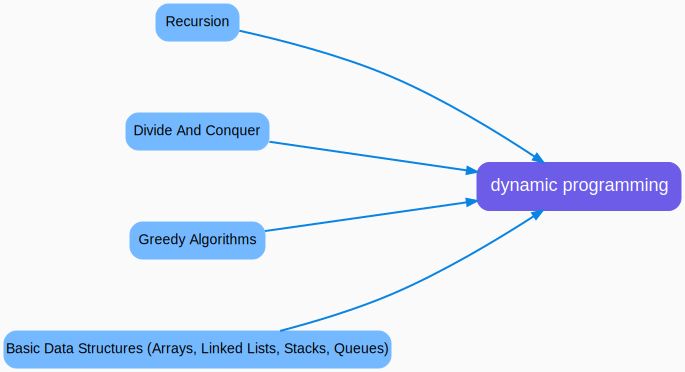

In [27]:
import json, re
from graphviz import Digraph
from langchain.schema import SystemMessage, HumanMessage
from IPython.display import display

# 🔹 1. Ask LLaMA 3 for top 3 prerequisites
def ask_llama3_prereqs(topic: str, k: int = 4) -> list[str]:
    prompt = (
        f"List {k} key prerequisite concepts a student should know "
        f"before learning {topic}. Respond ONLY as a JSON list of strings."
    )
    messages = [
        SystemMessage(content="You are a helpful educational tutor."),
        HumanMessage(content=prompt),
    ]
    resp = llm.invoke(messages)

    try:
        prereqs = json.loads(resp)
    except json.JSONDecodeError:
        prereqs = re.split(r",|\n|-", resp)

    return [p.strip().title() for p in prereqs if p.strip()]

# 🔹 2. Generate and display concise flowchart


def show_learning_flowchart(topic: str, color="#6c5ce7"):
    prereqs = ask_llama3_prereqs(topic)

    dot = Digraph(format="png")
    dot.attr(rankdir="LR", bgcolor="#fafafa", fontsize="16", fontname="Helvetica")
    dot.attr(nodesep="1", ranksep="1.2")

    # Main topic node: rounded corners, filled, white font
    dot.node(topic,
             shape="box",
             style="rounded,filled",
             color=color,
             fontcolor="white",
             fontname="Helvetica",
             fontsize="18",
             margin="0.2")

    # Prerequisites: lighter blue, rounded, black font
    prereq_color = "#74b9ff"
    for pre in prereqs:
        dot.node(pre,
                 shape="box",
                 style="rounded,filled",
                 color=prereq_color,
                 fontcolor="black",
                 fontname="Helvetica",
                 fontsize="14",
                 margin="0.15")
        dot.edge(pre, topic, penwidth="2", color="#0984e3")

    display(dot)


# 🔹 3. Call the flowchart function with user topic
show_learning_flowchart("dynamic programming")


# **BACKEND**

In [28]:
!pip -q install fastapi uvicorn nest-asyncio pyngrok
import nest_asyncio, os, json, re, pickle
nest_asyncio.apply()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 509.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.5 MB/s eta 0:00:00


In [29]:
!pip -q install fastapi uvicorn nest-asyncio pyngrok faiss-cpu groq langchain pymupdf nltk graphviz
import nest_asyncio, os
nest_asyncio.apply()


In [30]:
!pip -q install fastapi uvicorn nest-asyncio pyngrok faiss-cpu groq langchain pymupdf nltk


In [31]:
import nest_asyncio, os
nest_asyncio.apply()

# ngrok auth (optional — if you have a paid ngrok token)
# os.environ["NGROK_AUTH_TOKEN"] = "<YOUR_NGROK_AUTH_TOKEN>"

# Set your Groq API key
os.environ["GROQ_API_KEY"] = "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"

# Download NLTK punkt for PDF splitting
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
import os
print(os.environ.get("GROQ_API_KEY"))


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


In [82]:
# —— CHATBOT logic ——
import os
import random
import json, re
from groq import Groq
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import SystemMessage, HumanMessage

# 1️⃣ Load FAISS index & embeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.load_local(
    "/content/faiss_index.faiss",
    embedding_model,
    allow_dangerous_deserialization=True
)

# 2️⃣ LLaMA3 wrapper via Groq
class GroqLLM:
    def __init__(self, api_key: str):
        self.client = Groq(api_key=api_key)
        self.model = "llama3-8b-8192"

    def __call__(self, prompt: str, temperature: float = 0.0) -> str:
        resp = self.client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature
        )
        return resp.choices[0].message.content

llm = GroqLLM(api_key=os.environ["GROQ_API_KEY"])

def run_chatbot(question: str, k: int = 4) -> str:
    docs = vectorstore.as_retriever(search_kwargs={"k": k}).get_relevant_documents(question)
    context = "\n\n".join(d.page_content for d in docs)

    prompt = (
        "You are an expert tutor. Use the context below to answer the question.\n\n"
        f"CONTEXT:\n{context}\n\nQUESTION:\n{question}"
    )
    return llm(prompt)


# —— QUIZ logic ——
FACETS = ["definition", "standard operations", "time/space complexity", "advantages", "pitfalls"]
session_performance = []
seen_stems = set()
num_qs = 5

def generate_quiz(current_score: float, topic: str):
    # Determine difficulty
    if current_score >= 0.8:
        difficulty = "hard"
    elif current_score <= 0.4:
        difficulty = "easy"
    else:
        difficulty = "medium"

    # Pick facet cyclically or randomly
    facet = FACETS[len(session_performance) % len(FACETS)]

    # Retrieve relevant docs based on topic instead of fixed "quiz"
    docs = vectorstore.as_retriever(search_kwargs={"k": 10}).get_relevant_documents(topic)
    sampled_docs = random.sample(docs, min(5, len(docs))) if docs else []
    context = "\n".join(d.page_content for d in sampled_docs)

    # Prompt for quiz generation
    prompt = f"""
You are an AI quiz generator.
Create one {difficulty} MCQ about the topic '{topic}', focusing on {facet}.
Context:
\"\"\"{context}\"\"\"
Format:
Question: ...
Options:
A) ...
B) ...
C) ...
D) ...
Answer: <letter>
"""

    output = Groq(api_key=os.environ["GROQ_API_KEY"]).chat.completions.create(
        model="llama3-8b-8192",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    ).choices[0].message.content

    body, ans = output.rsplit("Answer:", 1)
    stem = body.split("Options:")[0].lower().strip()
    seen_stems.add(stem)

    return body.strip(), ans.strip().upper(), difficulty



# # —— LEARNING‑PATH logic ——
# def ask_llama3_prereqs(topic: str, k: int = 4):
#     prompt = (
#         f"List {k} key prerequisite concepts a student should know "
#         f"before learning {topic}. Respond only as a JSON list."
#     )
#     resp = llm(prompt)
#     try:
#         return json.loads(resp)
#     except:
#         return [s.strip().title() for s in re.split(r",|\n|-", resp) if s.strip()]

# def generate_learning_path(topic: str):
#     return ask_llama3_prereqs(topic) + [topic]
# Assuming llm is initialized as LangChain LLaMA 3 model supporting invoke(messages)
def ask_llama3_prereqs(topic: str, k: int = 4):
    prompt = (
        f"List {k} key prerequisite concepts a student should know "
        f"before learning {topic}. Respond ONLY as a JSON list of strings."
    )
    messages = [
        SystemMessage(content="You are a helpful educational tutor."),
        HumanMessage(content=prompt),
    ]
    resp = llm.invoke(messages)
    print(f"Raw LLaMA response: {resp}")

    try:
        prereqs = json.loads(resp)
        print(f"Parsed prereqs: {prereqs}")
        return prereqs
    except json.JSONDecodeError:
        fallback_list = [s.strip().title() for s in re.split(r",|\n|-", resp) if s.strip()]
        print(f"Fallback parsed list: {fallback_list}")
        return fallback_list

def generate_learning_path(topic: str):
    prereqs = ask_llama3_prereqs(topic)
    if not isinstance(prereqs, list):
        prereqs = []
    return prereqs + [topic]


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-252' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=SystemExit(1)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 163, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1536, in create_server
    raise OSError(err.errno, msg) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8001): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-81-68e770c4d21d>", line 91, in _r

In [39]:
# —— CHATBOT logic —— #CODE 2
import os
import random
import json, re
from groq import Groq
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import SystemMessage, HumanMessage
from graphviz import Digraph
from fastapi.responses import StreamingResponse
import io

# 1️⃣ Load FAISS index & embeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.load_local(
    "/content/faiss_index.faiss",
    embedding_model,
    allow_dangerous_deserialization=True
)

# 2️⃣ LLaMA3 wrapper via Groq
class GroqLLM:
    def __init__(self, api_key: str):
        self.client = Groq(api_key=api_key)
        self.model = "llama3-8b-8192"

    def __call__(self, prompt: str, temperature: float = 0.0) -> str:
        resp = self.client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature
        )
        return resp.choices[0].message.content

llm = GroqLLM(api_key=os.environ["GROQ_API_KEY"])

def run_chatbot(question: str, k: int = 4) -> str:
    docs = vectorstore.as_retriever(search_kwargs={"k": k}).get_relevant_documents(question)
    context = "\n\n".join(d.page_content for d in docs)

    prompt = (
        "You are an expert tutor. Use the context below to answer the question.\n\n"
        f"CONTEXT:\n{context}\n\nQUESTION:\n{question}"
    )
    return llm(prompt)


# —— QUIZ logic ——
def make_question(topic: str, diff: str, facet: str):
    # Assuming your vectorstore supports metadata filters or more specific search by facet
    # If not, consider concatenating facet with topic to bias retrieval
    search_query = f"{topic} {facet}"  # Bias retrieval by facet
    docs = vectorstore.as_retriever(search_kwargs={"k": 15}).get_relevant_documents(search_query)
    context = "\n".join(d.page_content for d in random.sample(docs, min(5, len(docs))))

    prompt = textwrap.dedent(f"""
    You are an AI quiz generator.
    Create exactly one {diff} difficulty multiple-choice question (MCQ) about the topic "{topic}".
    The question must focus ONLY on the facet: "{facet}".
    Use this format exactly:

    Question: <question text>
    Options:
    A) ...
    B) ...
    C) ...
    D) ...
    Answer: <one uppercase letter>

    Context:
    \"\"\"{context}\"\"\"
    """)

    print(f"[DEBUG] Prompt sent for facet: {facet}:\n{prompt}")
    out = llm(prompt, temperature=0.7)

    try:
        body, ans = out.rsplit("Answer:", 1)
    except ValueError:
        body = out
        ans = "A"

    return body.strip(), ans.strip().upper()


# # —— LEARNING‑PATH logic ——
# def ask_llama3_prereqs(topic: str, k: int = 4):
#     prompt = (
#         f"List {k} key prerequisite concepts a student should know "
#         f"before learning {topic}. Respond only as a JSON list."
#     )
#     resp = llm(prompt)
#     try:
#         return json.loads(resp)
#     except:
#         return [s.strip().title() for s in re.split(r",|\n|-", resp) if s.strip()]

# def generate_learning_path(topic: str):
#     return ask_llama3_prereqs(topic) + [topic]
# Assuming llm is initialized as LangChain LLaMA 3 model supporting invoke(messages)

def ask_llama3_prereqs(topic: str, k: int = 4):
    prompt = (
        f"You are a helpful educational tutor.\n"
        f"List {k} key prerequisite concepts a student should know "
        f"before learning {topic}. Respond ONLY as a JSON list of strings."
    )
    resp = llm(prompt)  # Call GroqLLM correctly
    print(f"Raw LLaMA response: {resp}")

    try:
        prereqs = json.loads(resp)
        print(f"Parsed prereqs: {prereqs}")
        return prereqs
    except json.JSONDecodeError:
        fallback_list = [s.strip().title() for s in re.split(r",|\n|-", resp) if s.strip()]
        print(f"Fallback parsed list: {fallback_list}")
        return fallback_list


def generate_flowchart(topic: str):
    prereqs = ask_llama3_prereqs(topic)
    dot = Digraph(format="png")
    dot.attr(rankdir="LR", bgcolor="#fafafa", fontsize="16", fontname="Helvetica")
    dot.attr(nodesep="1", ranksep="1.2")

    dot.node(topic,
             shape="box",
             style="rounded,filled",
             color="#6c5ce7",
             fontcolor="white",
             fontname="Helvetica",
             fontsize="18",
             margin="0.2")

    for pre in prereqs:
        dot.node(pre,
                 shape="box",
                 style="rounded,filled",
                 color="#74b9ff",
                 fontcolor="black",
                 fontname="Helvetica",
                 fontsize="14",
                 margin="0.15")
        dot.edge(pre, topic, penwidth="2", color="#0984e3")

    img_bytes = dot.pipe(format="png")
    return io.BytesIO(img_bytes)


In [38]:
import textwrap

for f in FACETS:
    q, a = make_question("linked lists", "easy", f)
    print(f"Facet: {f}\nQuestion:\n{q}\nAnswer: {a}\n{'-'*40}")


[DEBUG] Prompt sent for facet: definition:

    You are an AI quiz generator.
    Create exactly one easy difficulty multiple-choice question (MCQ) about the topic "linked lists".
    The question must focus ONLY on the facet: "definition".
    Use this format exactly:

    Question: <question text>
    Options:
    A) ...
    B) ...
    C) ...
    D) ...
    Answer: <one uppercase letter>

    Context:
    """•A linked list is a data structure which can change during execution.•Successive elements are connected by pointers.•Last element points to NULL.•It can grow or shrink in size during execution of a program.•It can be made just as long as required.•It does not waste memory space.Spring 2012 Programming and Data Structure6A B Chead
Linked Lists 5
Singly Linked Lists•A singly linked list is a concrete data structure consisting of a sequence of nodes•Each node stores•element•link to the next nodenextelemnodeABCD
Doubly Linked List
Singly Linked List
• Singly linked lists contain nod

In [40]:
from pyngrok import ngrok

# Replace with your actual token from ngrok dashboard
ngrok.set_auth_token("2xFnqdmNu7BVDZU3X00INzkE14w_7VqLYGDF7dQAXsajukSXe")


In [59]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
from pyngrok import ngrok
import uvicorn, threading
from fastapi.middleware.cors import CORSMiddleware
from typing import List

# —–– FastAPI setup —–
app = FastAPI(title="Colab‑Powered Learning API")

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # For testing, allow all origins. Later restrict as needed.
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class ChatReq(BaseModel):
    question: str
class ChatResp(BaseModel):
    answer: str

class QuizReq(BaseModel):
    current_score: float
    topic: str
class QuizResp(BaseModel):
    question: str
    answer: str      # <-- add this
    difficulty: str


class PathReq(BaseModel):
    topic: str
class PathResp(BaseModel):
    path: List[str]

@app.post("/chat", response_model=ChatResp)
def chat_ep(req: ChatReq):
    return ChatResp(answer=run_chatbot(req.question))


@app.post("/quiz", response_model=List[QuizResp])
def quiz_ep(req: QuizReq):
    results = []
    for _ in range(5):
        q, ans, diff = generate_quiz(req.current_score, req.topic)
        results.append(QuizResp(question=q, answer=ans, difficulty=diff))
    return results


@app.post("/learning-path", response_model=PathResp)
def path_ep(req: PathReq):
    try:
        path = generate_learning_path(req.topic)
        if not isinstance(path, list):
            path = []
        return PathResp(path=path)
    except Exception as e:
        print(f"Error in /learning-path: {e}")
        return PathResp(path=[])

# —–– expose via ngrok —–
public_url = ngrok.connect(8001, "http")
print("🚀 Public URL:", public_url)

def _run():
    uvicorn.run(app, host="0.0.0.0", port=8001)

threading.Thread(target=_run, daemon=True).start()


🚀 Public URL: NgrokTunnel: "https://24fc-34-125-133-151.ngrok-free.app" -> "http://localhost:8001"


In [41]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
from pyngrok import ngrok
import uvicorn, threading
from fastapi.middleware.cors import CORSMiddleware
from typing import List
from fastapi import Response

# from quiz_logic import FACETS, session, make_question, num_qs
# —–– FastAPI setup —– #CODE 2
app = FastAPI(title="Colab‑Powered Learning API")

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # For testing, allow all origins. Later restrict as needed.
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)
num_qs = 5


class ChatReq(BaseModel):
    question: str
class ChatResp(BaseModel):
    answer: str

class QuizReq(BaseModel):
    current_score: float
    topic: str
class QuizResp(BaseModel):
    question: str
    answer: str      # <-- add this
    difficulty: str


class PathReq(BaseModel):
    topic: str
class PathResp(BaseModel):
    path: List[str]

@app.post("/chat", response_model=ChatResp)
def chat_ep(req: ChatReq):
    return ChatResp(answer=run_chatbot(req.question))






import random

# Reset seen_stems per request
@app.post("/quiz", response_model=List[QuizResp])
def quiz_ep(req: QuizReq):
    global seen_stems
    seen_stems = set()  # Reset at start of request

    # Adjust difficulty based on current_score
    if req.current_score >= 0.8:
        session.current_diff = "hard"
    elif req.current_score <= 0.4:
        session.current_diff = "easy"
    else:
        session.current_diff = "medium"

    results = []
    tries_limit = 3

    for i in range(num_qs):
        facet = FACETS[i % len(FACETS)]
        print(f"[DEBUG] Generating question {i+1} on facet: {facet}")

        for attempt in range(tries_limit):
            q, ans = make_question(req.topic, session.current_diff, facet)
            stem = q.split("Options:")[0].strip().lower()

            if stem in seen_stems:
                print(f"[DEBUG] Duplicate question stem detected on attempt {attempt+1}, retrying...")
                continue  # Retry
            else:
                seen_stems.add(stem)
                results.append(QuizResp(question=q, answer=ans, difficulty=session.current_diff))
                break
        else:
            print(f"[WARNING] Could not generate unique question for facet {facet} after {tries_limit} attempts.")
            # Optionally, generate a fallback question or skip

    return results



@app.post("/learning-path")
def path_ep(req: PathReq):
    try:
        image_stream = generate_flowchart(req.topic)
        return StreamingResponse(image_stream, media_type="image/png")
    except Exception as e:
        print(f"Error in /learning-path: {e}")
        return Response(content="Failed to generate flowchart", status_code=500)

# —–– expose via ngrok —–
public_url = ngrok.connect(8002, "http")
print("🚀 Public URL:", public_url)

def _run():
    uvicorn.run(app, host="0.0.0.0", port=8002)

threading.Thread(target=_run, daemon=True).start()


🚀 Public URL: NgrokTunnel: "https://ae6d-35-223-227-18.ngrok-free.app" -> "http://localhost:8002"


In [37]:
from pyngrok import ngrok

# List active tunnels
tunnels = ngrok.get_tunnels()
for t in tunnels:
    print(t.public_url, t.name)

# Kill a specific tunnel by public_url or name
ngrok.disconnect(tunnels[0].public_url)  # disconnect first tunnel


https://4fd2-35-223-227-18.ngrok-free.app http-8002-968d3001-5b88-4a61-b151-312cc55de94f


# **ADDITIONAL FEATURES**



**Mind map** --> DONE

---


**Personalized quiz** --> DONE


---

**Learning Path** --> DONE

---


In [ ]:
!pip install -q spacy networkx pyvis
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from langchain.document_loaders import PyPDFLoader
import os

root_dir = "/content/drive/MyDrive/algoviz/copied_pdfs"
all_chunks = []

for dirpath, dirnames, filenames in os.walk(root_dir):
    for file in filenames:
        if file.endswith(".pdf"):
            loader = PyPDFLoader(os.path.join(dirpath, file))
            docs = loader.load_and_split()
            all_chunks.extend([doc.page_content for doc in docs])  # 🟢 Extract text

print(f"Loaded {len(all_chunks)} chunks.")


Loaded 704 chunks.


### **MINDMAP**

In [ ]:
!pip install langchain faiss-cpu tiktoken openai
!pip install --upgrade langchain-community


"""
You are an expert CS professor. From the corpus of documents, list the most important algorithm and data structure topics and their prerequisite relationships. Format output as a JSON array of nodes:

[
  {
    "topic": "Dynamic Programming",
    "subtopics": ["Memoization", "Tabulation"],
    "prerequisites": ["Recursion"]
  },
  {
    "topic": "Graphs",
    "subtopics": ["DFS", "BFS", "Shortest Path"],
    "prerequisites": []
  }
]

Please include only the most significant topics related to algorithms(all kinds in syllabus) and data structures suitable for undergraduate computer science engineering coursework.


In [ ]:
# Install pyvis in Colab (if not installed)
!pip install pyvis


In [ ]:
from pyvis.network import Network
from IPython.display import IFrame

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# Mind map data without URLs or link icons
mind_map = {
    "Data Structures": {
        "desc": "Organizing data efficiently",
        "color": "#e67e22",
        "subs": {
            "Arrays": {"desc": "Contiguous memory blocks", "subs": {}},
            "Linked Lists": {
                "desc": "Nodes connected by pointers",
                "subs": {
                    "Singly Linked List": {"desc": "One-way link", "subs": {}},
                    "Doubly Linked List": {"desc": "Two-way link", "subs": {}},
                    "Circular Linked List": {"desc": "Last node points to head", "subs": {}},
                }
            },
            "Stacks": {"desc": "LIFO structure", "subs": {}},
            "Queues": {"desc": "FIFO structure", "subs": {}},
            "Trees": {
                "desc": "Hierarchical nodes",
                "subs": {
                    "Binary Tree": {"desc": "Max two children", "subs": {}},
                    "Binary Search Tree": {"desc": "Ordered tree", "subs": {}},
                    "AVL Tree": {"desc": "Self-balancing BST", "subs": {}},
                    "Red-Black Tree": {"desc": "Balanced BST", "subs": {}},
                }
            },
            "Graphs": {"desc": "Nodes and edges", "subs": {}},
            "Hash Tables": {"desc": "Key-value pairs", "subs": {}},
        }
    },
    "Algorithms": {
        "desc": "Step-by-step problem solving",
        "color": "#16a085",
        "subs": {
            "Sorting": {
                "desc": "Ordering data",
                "subs": {
                    "Quick Sort": {"desc": "Divide and conquer", "subs": {}},
                    "Merge Sort": {"desc": "Stable sort", "subs": {}},
                    "Heap Sort": {"desc": "Using heap", "subs": {}},
                    "Bubble Sort": {"desc": "Simple, inefficient", "subs": {}},
                }
            },
            "Searching": {
                "desc": "Find element",
                "subs": {
                    "Binary Search": {"desc": "Logarithmic search", "subs": {}},
                    "Linear Search": {"desc": "Sequential search", "subs": {}},
                }
            },
            "Divide and Conquer": {"desc": "Split problem recursively", "subs": {}},
            "Dynamic Programming": {"desc": "Optimal substructure", "subs": {}},
            "Greedy": {"desc": "Locally optimal choices", "subs": {}},
            "Backtracking": {"desc": "Try all possibilities", "subs": {}},
        }
    },
    "AIML Algorithms": {
        "desc": "Artificial Intelligence & Machine Learning",
        "color": "#8e44ad",
        "subs": {
            "Linear Regression": {"desc": "Predict continuous output", "subs": {}},
            "Logistic Regression": {"desc": "Binary classification", "subs": {}},
            "Decision Trees": {"desc": "Tree based model", "subs": {}},
            "Random Forests": {"desc": "Ensemble of trees", "subs": {}},
            "Neural Networks": {"desc": "Deep learning", "subs": {}},
            "SVM": {"desc": "Support Vector Machine", "subs": {}},
            "K-Means": {"desc": "Clustering algorithm", "subs": {}},
            "PCA": {"desc": "Dimensionality reduction", "subs": {}},
            "K-Means": {"desc": "Clustering algorithm", "subs": {}},
            "KNN": {"desc": "K nearest neighbors", "subs": {}},

        }
    },
    "Important Computer Science Courses": {
        "desc": "Additional core subjects",
        "color": "#2980b9",
        "subs": {
            "Operating Systems": {"desc": "Manage hardware & software", "subs": {}},
            "DBMS": {"desc": "Database Management Systems", "subs": {}},
            "Computer Networks": {"desc": "Communication protocols", "subs": {}},
            "Software Engineering": {"desc": "Development processes", "subs": {}},
            "Theory of Computation": {"desc": "Mathematical foundations", "subs": {}},
            "Compiler Design": {"desc": "Translate source code", "subs": {}},
        }
    }
}

def add_nodes_edges(parent, subs):
    for node, data in subs.items():
        title = data.get("desc", "")
        color = data.get("color", None)
        size = 25 if parent == "" else 15
        net.add_node(node, label=node, title=title, size=size, color=color or "#3498db", opacity=0.1 if parent else 1)
        if parent:
            net.add_edge(parent, node)
        if data.get("subs"):
            add_nodes_edges(node, data["subs"])

# Add main topics
for main_topic, info in mind_map.items():
    net.add_node(main_topic, label=main_topic, title=info["desc"], size=30, color=info["color"], opacity=1)
    add_nodes_edges(main_topic, info["subs"])

toggle_js = """
function toggleSubnodes(params) {
  if(params.nodes.length === 1){
    var clickedNode = params.nodes[0];
    var connectedNodes = network.getConnectedNodes(clickedNode);
    connectedNodes.forEach(function(nodeId){
      var node = nodes.get(nodeId);
      if(node.opacity === 0.1){
        nodes.update({id: nodeId, opacity: 1, size: 15});
      } else {
        nodes.update({id: nodeId, opacity: 0.1, size: 1});
      }
    });
  }
}
network.on("click", toggleSubnodes);

network.on("selectNode", function(params) {
    nodes.forEach(function(node) {
        nodes.update({id: node.id, color: {background: node.color}});
    });
    edges.forEach(function(edge) {
        edges.update({id: edge.id, color: {color: '#bbb'}});
    });
    if(params.nodes.length === 1) {
        var selectedNode = params.nodes[0];
        nodes.update({id: selectedNode, color: {background: '#ff6347'}});
        var connectedEdges = network.getConnectedEdges(selectedNode);
        connectedEdges.forEach(function(edgeId) {
            edges.update({id: edgeId, color: {color: '#ff6347'}, width: 2});
        });
    }
});
"""
net.set_options("""
var options = {
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -3000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09,
      "avoidOverlap": 1
    }
  },
  "interaction": {
    "hover": true,
    "tooltipDelay": 200,
    "multiselect": false,
    "navigationButtons": true,
    "keyboard": true
  }
}
""")


html_file = "cse_mindmap_no_urls.html"
net.show(html_file)

with open(html_file, "r", encoding="utf-8") as f:
    html = f.read()

insert_after = "var network = new vis.Network(container, data, options);"
idx = html.find(insert_after)
if idx != -1:
    idx_end = idx + len(insert_after)
    html = html[:idx_end] + "\n" + toggle_js + "\n" + html[idx_end:]

with open(html_file, "w", encoding="utf-8") as f:
    f.write(html)

IFrame(src=html_file, width="100%", height=700)


In [ ]:
1